# Linear Regression (California Housing)


**Import Required Libraries**

This imports all the necessary Python libraries:

pandas, numpy → Data handling

seaborn, matplotlib → Visualization

sklearn.datasets → Fetch California Housing dataset

sklearn.model_selection → Train/test split

sklearn.linear_model → Linear regression model

sklearn.metrics → R² score, MSE

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


**Load the California Housing Dataset**

Uses the built-in dataset from scikit-learn.
It contains:

Features (data)

Target (target) → Median house value


In [2]:
california = fetch_california_housing()
california


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

**Convert to Pandas DataFrame**

Makes data easier to manipulate

Also adds a MedHouseValue column for the target

In [3]:
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseValue'] = california.target

df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**Basic Dataset Summary**

We print:

Shape of dataset

Missing values

Basic statistics

In [4]:
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
df.describe()


Dataset Shape: (20640, 9)

Missing Values:
 MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


**EDA: Distribution Plots**

Plot histograms for key variables:

Median Income (MedInc)

Average Rooms (AveRooms)

House Value (target)



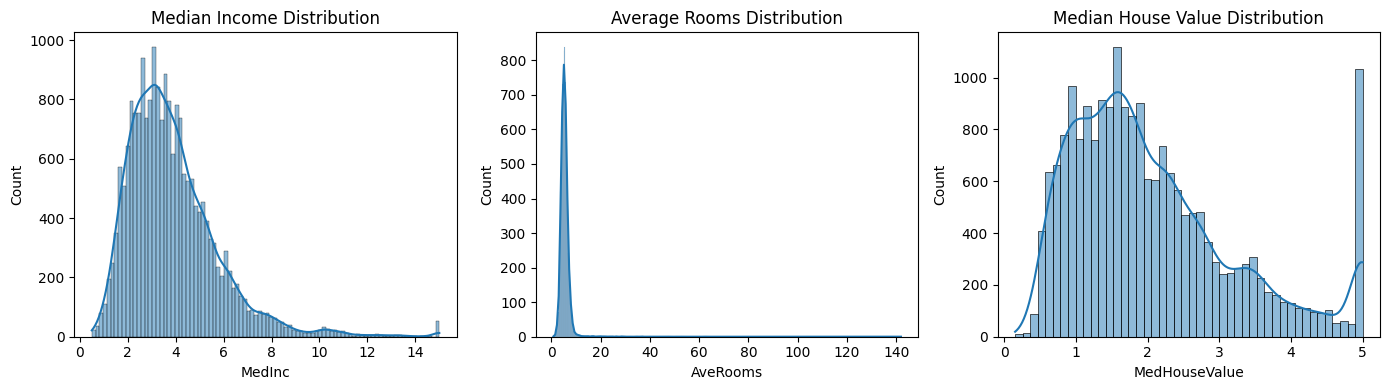

In [5]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.histplot(df["MedInc"], kde=True)
plt.title("Median Income Distribution")

plt.subplot(1,3,2)
sns.histplot(df["AveRooms"], kde=True)
plt.title("Average Rooms Distribution")

plt.subplot(1,3,3)
sns.histplot(df["MedHouseValue"], kde=True)
plt.title("Median House Value Distribution")

plt.tight_layout()
plt.show()


**Correlation Heatmap**

Shows how strongly each feature relates to house value.

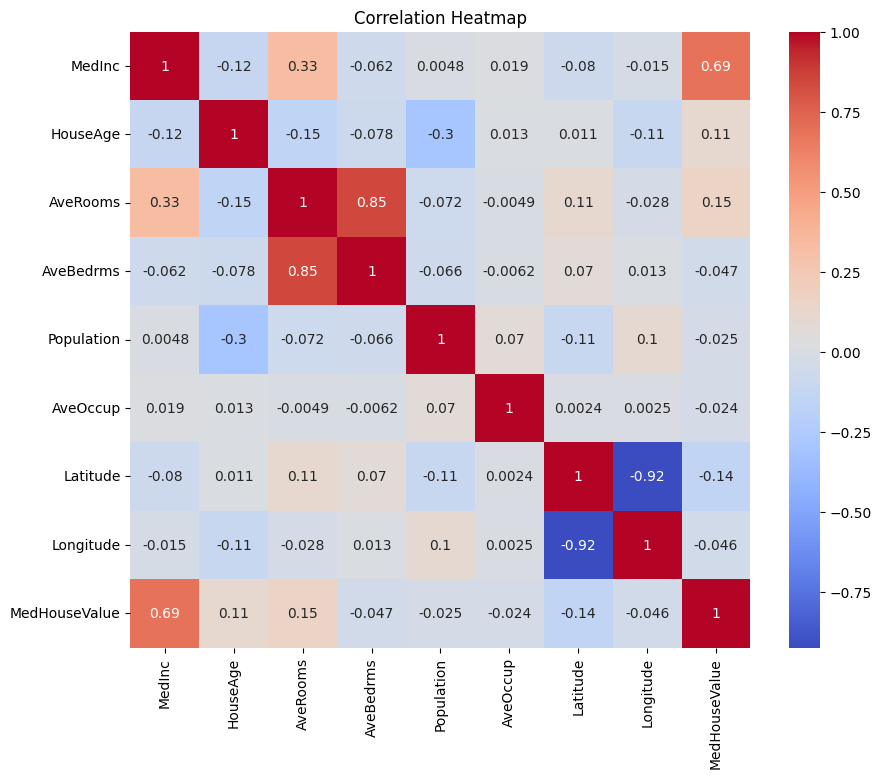

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


**Select Relevant Numerical Features**

According to lab instructions, choose meaningful features:

MedInc → Strongest correlation

AveRooms

AveOccup

HouseAge

You can add more if required.


In [7]:
features = ["MedInc", "AveRooms", "AveOccup", "HouseAge"]
X = df[features]
y = df["MedHouseValue"]

X.head()


,MedInc,AveRooms,AveOccup,HouseAge
0,8.3252,6.984127,2.555556,41.0
1,8.3014,6.238137,2.109842,21.0
2,7.2574,8.288136,2.802260,52.0
3,5.6431,5.817352,2.547945,52.0
4,3.8462,6.281853,2.181467,52.0


**Train-Test Split (80/20)**

Separates dataset for training the model and evaluating it.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((16512, 4), (4128, 4))

**Train Linear Regression Model**

Creates a model object and fits it using training data.

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Model Training Complete!")


Model Training Complete!


**Predict on Test Set**

Uses the trained model to predict house values for unseen data.

In [10]:
y_pred = model.predict(X_test)


**Evaluate Model (R² Score + MSE)**

R² score → Measures how well data fits a regression line

MSE → Measures average squared error

In [11]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)


R² Score: 0.49828508595474374
Mean Squared Error: 0.657451727882265


**Plot Actual vs Predicted Values**

Scatter plot helps visually inspect prediction quality.

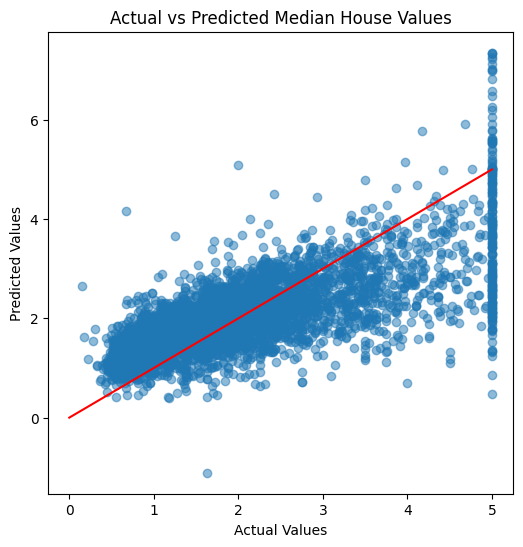

In [12]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Median House Values")
plt.plot([0,5], [0,5], color='red')  # reference line
plt.show()


The Linear Regression model achieved an R² score showing how much variance in the
target (median house value) is explained by the selected features. A higher R²
indicates better performance. The MSE value reflects the average squared error
between actual and predicted values — lower is better.

Strengths:
- Simple model, easy to interpret coefficients.
- Works well for roughly linear relationships.
- Fast training time even on large datasets.

Weaknesses / Limitations:
- Assumes linearity between features and target.
- Sensitive to outliers.
- Cannot capture complex relationships without feature engineering.
- Multicollinearity may affect coefficient stability.

Overall, while linear regression provides a useful baseline, more advanced
models (Random Forest, Gradient Boosting, Neural Networks) can achieve
significantly better accuracy on housing price prediction tasks.
